In [1]:
#import the packages
import math
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
style.use('ggplot')
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import sklearn
from sklearn.metrics import mean_squared_error

In [2]:
#check directory
cwd = os.getcwd()
cwd

bycountry= pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=None)
bycountry.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [3]:
#take a look at Nepal
nepal=bycountry.loc[bycountry['Country'] == "Nepal"]
type(nepal)
nepal.infer_objects()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
361462,1796-01-01,5.934,2.235,Nepal
361463,1796-02-01,7.780,1.645,Nepal
361464,1796-03-01,10.935,2.241,Nepal
361465,1796-04-01,16.477,1.737,Nepal
361466,1796-05-01,20.338,1.663,Nepal
361467,1796-06-01,21.781,2.825,Nepal
361468,1796-07-01,21.020,2.269,Nepal
361469,1796-08-01,21.276,2.867,Nepal
361470,1796-09-01,19.257,3.167,Nepal
361471,1796-10-01,15.819,1.627,Nepal


In [4]:
temp=nepal['AverageTemperature']
temp=temp.dropna(how='any')

array([-1.55599873, -1.23229229, -0.67904538, ...,  1.15166708,
        1.15026424,  1.11834952])

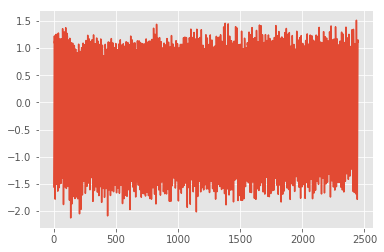

In [5]:
#pre-processing
scale=preprocessing.scale(temp)
plt.plot(scale)
scale

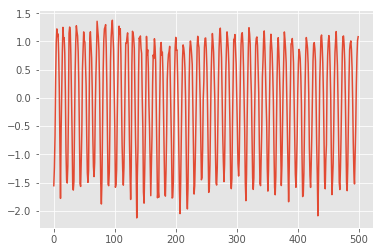

In [6]:
#let's get a small sample to see
scale
df=DataFrame(scale)
sample=df[0:500]
sample
plt.plot(sample)
#now we can see the patterns

In [7]:
#now we can see the patterns

X=sample.values
X
train, test = X[0:-100], X[-100:]
train
test

array([[ 0.10847662],
       [ 0.5978941 ],
       [ 0.86057679],
       [ 0.81743931],
       [ 0.69574252],
       [ 0.38097922],
       [-0.1098411 ],
       [-1.04851962],
       [-1.74818847],
       [-1.72188513],
       [-1.33294641],
       [-0.49755233],
       [ 0.21579425],
       [ 0.77079472],
       [ 1.06977602],
       [ 0.9861314 ],
       [ 0.87811235],
       [ 0.60543439],
       [ 0.08234864],
       [-0.87421616],
       [-1.37450568],
       [-1.58633525],
       [-1.18810268],
       [-0.66449086],
       [ 0.02237702],
       [ 0.65646287],
       [ 0.94755316],
       [ 0.98052002],
       [ 0.87162419],
       [ 0.65453396],
       [-0.01129125],
       [-0.81652417],
       [-1.36486113],
       [-2.08872904],
       [-1.44464792],
       [-0.68079893],
       [ 0.29505498],
       [ 0.69311219],
       [ 1.07345848],
       [ 1.11449169],
       [ 0.93019296],
       [ 0.62279459],
       [ 0.08550504],
       [-0.74269946],
       [-1.48340151],
       [-1

RMSE: 0.530


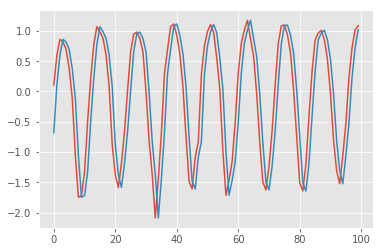

0.5302435957527816

In [8]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()
rmse

In [9]:
#a smaller sample of 50
sample2=sample[0:50]
X2=sample2.values
X2
train2, test2 = X2[0:-10], X2[-10:]
train2
test2

array([[ 0.81638717],
       [ 0.2629649 ],
       [-0.68342927],
       [-1.51443945],
       [-1.56862433],
       [-1.1134012 ],
       [-0.57383202],
       [ 0.51267128],
       [ 0.8344488 ],
       [ 1.16955335]])

RMSE: 0.622


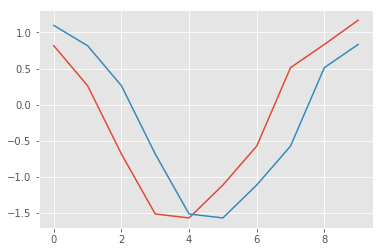

0.6220490938792729

In [10]:
# walk-forward validation
history2 = [x for x in train2]
predictions2 = list()
for i in range(len(test2)):
	# make prediction2
	predictions2.append(history2[-1])
	# observation
	history2.append(test2[i])
# report performance
rmse2 = math.sqrt(mean_squared_error(test2, predictions2))
print('RMSE: %.3f' % rmse2)
# line plot of observed vs predicted
pyplot.plot(test2)
pyplot.plot(predictions2)
pyplot.show()
rmse2

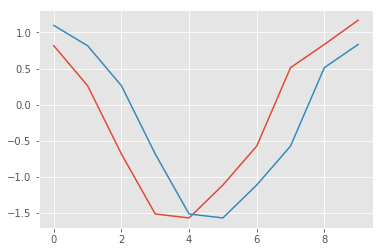

In [11]:
pyplot.plot(test2)
pyplot.plot(predictions2)
rcParams['figure.figsize'] = 20, 10
pyplot.show()


In [12]:
## Countries with the highest temperature differences¶
## Now let's look at the top 15 countries with highest temperature differences. Temperature difference is the difference between the maximum and minimum temperature value.

In [13]:
tempByCountry = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
countries = tempByCountry['Country'].unique()

In [14]:
import seaborn as sns


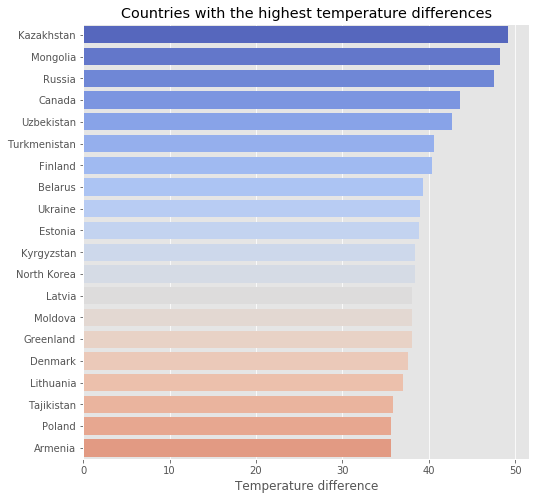

In [15]:
max_min_list = []

# getting max and min temperatures
for country in countries:
    curr_temps = tempByCountry[tempByCountry['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# NaN cleaning
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])

# calculating the differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting the result
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))

# ploting the chart
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:20], y=res_countries[:20], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the highest temperature differences")

In [16]:
#reading the file and collecting only the timestamp and the year 
dframe= pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df_ny = dframe[dframe['City']=='New York']
df_ny= df_ny.iloc[:, :2]
df_ny.head(10)

,dt,AverageTemperature
169769,1743-11-01,3.264
169770,1743-12-01,NaN
169771,1744-01-01,NaN
169772,1744-02-01,NaN
169773,1744-03-01,NaN
169774,1744-04-01,9.788
169775,1744-05-01,15.708
169776,1744-06-01,21.210
169777,1744-07-01,22.207
169778,1744-08-01,NaN


In [17]:
#selecting only the year from the time stamp and grouping the data by mean temperature of each year
a = df_ny['dt'].apply(lambda x: int(x[0:4]))
grouped = df_ny.groupby(a).mean()
grouped.head(10)

,AverageTemperature
dt,
1743,3.264000
1744,11.660375
1745,1.134500
1746,NaN
1747,NaN
1748,NaN
1749,NaN
1750,10.071455
1751,10.794625


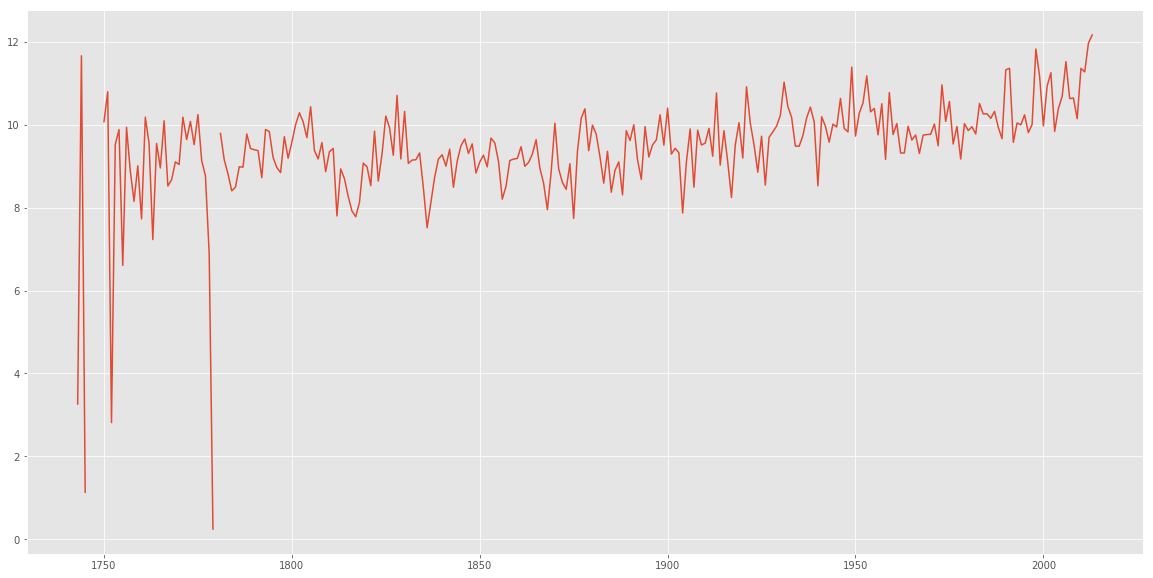

In [18]:
#plotting the data
plt.plot(grouped['AverageTemperature'])
plt.show()
#As we can see there are several blank spaces due to the Nan's blocks in the data

In [19]:
df_kath['AverageTemperature'] = df_kath['AverageTemperature'].fillna(method = 'ffill')
grouped = df_kath.groupby(a).mean()
plt.plot(grouped['AverageTemperature'])
plt.xlabel('year')
plt.ylabel('temperature in degree celsius')
plt.title('New York avreage temperature verus year')
plt.show()

NameError: name 'df_kath' is not defined

In [ ]:
#modelling the data to obtain future values
from sklearn.linear_model import LinearRegression as LinReg


In [ ]:
#reshaping the index of 'grouped'i.e years
x= grouped.index.values.reshape(-1,1)
#obtaining values of temperature
y = grouped['AverageTemperature'].values


In [ ]:
#Using linear regression and finding accuracy of our prediction
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
Accuracy = str(reg.score(x,y))
print(Accuracy)

In [ ]:
#plotting data along with regression
plt.scatter(x=x, y=y_preds)
plt.scatter(x=x,y=y, c='r')
plt.ylabel('Average Temperature in degree celsius')
plt.xlabel('year')
plt.show()

In [ ]:
#finding future values of temperature
reg.predict(2048)

In [ ]:
reg.predict(2020)

In [ ]:
#A quick chart of the five hottest cities in 2010
dd = dframe[pd.DatetimeIndex(dframe['dt']).year == 2010][['City', 'Country', 'AverageTemperature']].groupby(['City', 'Country']).mean().sort_values('AverageTemperature',ascending=False).head(n=10)
dd